<a href="https://colab.research.google.com/github/joao-pedro-silva/Curso-de-Machine-Learning-Introdu-o-a-classifica-o-com-SKLearn/blob/main/Introducao_a_Machine_Learning_e_Classificacao_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!pip install seaborn==0.9.0

In [2]:
import pandas as pd 
uri= 'https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv'
dados = pd.read_csv(uri)

In [3]:
dados.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [4]:
a_renomear = {
    'expected_hours' : 'horas_esperadas',
    'price' : 'preco',
    'unfinished' : 'nao_finalizado'
}

dados = dados.rename(columns = a_renomear)
dados.head()

,nao_finalizado,horas_esperadas,preco
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [5]:
troca = {
    1:0,
    0:1,
}
dados['finalizado'] = dados.nao_finalizado.map(troca)

In [6]:
dados.tail()

,nao_finalizado,horas_esperadas,preco,finalizado
2152,0,80,7518,1
2153,1,52,1332,0
2154,0,40,473,1
2155,0,75,5324,1
2156,1,37,377,0


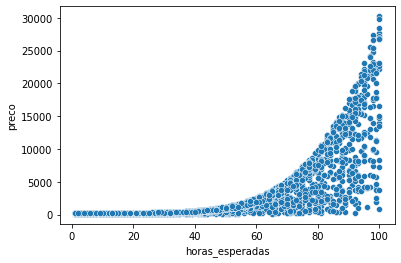

In [7]:
import seaborn as sns

sns.scatterplot(x="horas_esperadas", y="preco", data=dados)

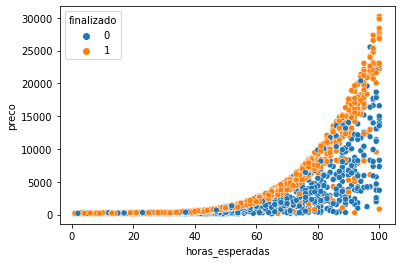

In [8]:
sns.scatterplot(x="horas_esperadas", y="preco", hue="finalizado",data=dados)

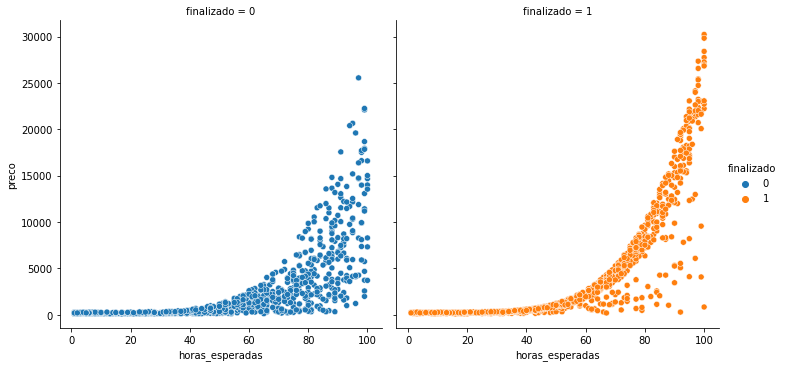

In [9]:
sns.relplot(x="horas_esperadas", y="preco", hue="finalizado", col="finalizado",data=dados)

In [10]:
x = dados[["horas_esperadas", "preco"]]
y = dados["finalizado"]

In [11]:
from sklearn.model_selection import train_test_split

SEED = 20

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, random_state = SEED, test_size = 0.25,
                                                        stratify = y) #separar proporcionalmente seguindo o y
print("X Train {}, Y Train {}".format(treino_x.shape, treino_y.shape))

from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score


modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

accuracia = accuracy_score(teste_y, previsoes) * 100

print("A acuracia foi %.2f%%" % accuracia)

X Train (1617, 2), Y Train (1617,)
A acuracia foi 53.89%


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [12]:
import numpy as np
previsoes_de_base = np.ones(540)

In [13]:
accuracia = accuracy_score(teste_y, previsoes_de_base) * 100

print("A acuracia do algortimo de baseline foi %.2f%%" % accuracia)

A acuracia do algortimo de baseline foi 52.59%


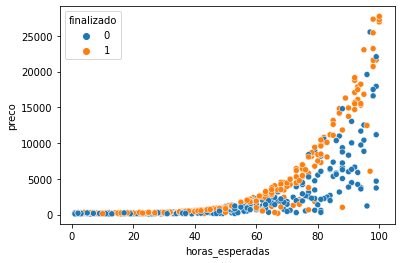

In [14]:
sns.scatterplot(x="horas_esperadas", y="preco", hue=teste_y,data=teste_x)

In [15]:
x_min = teste_x.horas_esperadas.min()
x_max = teste_x.horas_esperadas.max()
y_min = teste_x.preco.min()
y_max = teste_x.preco.max()

print(x_min, x_max, y_min, y_max)

1 100 101 27738


In [16]:
pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

In [17]:
xx, yy = np.meshgrid(eixo_x, eixo_y)

pontos = np.c_[xx.ravel(), yy.ravel()]

In [18]:
pontos

array([[1.000000e+00, 1.010000e+02],
       [1.990000e+00, 1.010000e+02],
       [2.980000e+00, 1.010000e+02],
       ...,
       [9.703000e+01, 2.746163e+04],
       [9.802000e+01, 2.746163e+04],
       [9.901000e+01, 2.746163e+04]])

In [19]:
Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)

In [20]:
#Decision Boundary

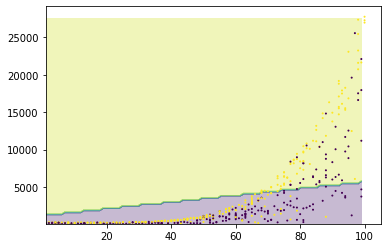

In [21]:
import matplotlib.pyplot as plt
plt.contourf(xx, yy, Z, alpha = 0.3)
plt.scatter(teste_x.horas_esperadas, teste_x.preco, c=teste_y, s=1)